In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('data/acs2017_census_tract_data.csv')
print(df.shape)
df.head()


(74001, 37)


,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [2]:
df = df.dropna()
print('Shape after dropping missing values ',df.shape)

Shape after dropping missing values  (72718, 37)


In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode string columns as integers
string_data = df.select_dtypes(include='object').columns
encode = {}
for col in string_data:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encode[col] = le

print('Encoding categorical variables', list(string_data))

Encoding categorical variables ['State', 'County']


In [4]:
# Taking a look at the County column 
num_counties = df['County'].nunique()
print(f'Number of unique counties', {num_counties})
print(df['County'].value_counts().head(10))

Number of unique counties {1954}
County
1045    2300
420     1317
1300     929
1089     885
1189     822
878      788
769      785
942      773
1860     754
368      688
Name: count, dtype: int64


## County Column Decision

The dataset contains 1,954 unique counties which would yield extremely high cardinality for a categorical variable. If we one-hot encode this it would add over 2000 binary features, this would add more dimensionality for little gain in improving predictive performance. 

Also, the county distribution is highly skewed with some counties having thousands of tracks while other have very few making the feature unbalanced and bias toward larger counties. 

Because the socioeconomic factors like income, unemployment, and rent already encode regional attributes, I think keeping County would introduce redundancy and possible overfitting. So, im choosing to drop this variable.

In [5]:
df = df.drop(columns=['County'])
print('Shape after dropping County:',df.shape)

Shape after dropping County: (72718, 36)


In [6]:
# Looking at TractID
num_tracks = df['TractId'].nunique()
print(f'Number of unique Tract IDs: ',{num_tracks})
print(df['TractId'].value_counts().head(10))

Number of unique Tract IDs:  {72718}
TractId
1001020100     1
37119003103    1
37119003203    1
37119003201    1
37119003109    1
37119003108    1
37119003106    1
37119003105    1
37119003102    1
37119003300    1
Name: count, dtype: int64


The TractID has 72718 unique values, and since every value occurs exactly once it seems it's serving as just a row identifier rather than having some predictive information. Just like the County variable it could cause overfitting instead of learning more meaningful relationships between socioeconomic features and child poverty. So, this will be removed as well.

In [7]:
df = df.drop(columns=["TractId"])
print('Shape after dropping Tract ID:',df.shape)
df.head()

Shape after dropping Tract ID: (72718, 35)


,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,0,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,0,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,0,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,0,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


Using matplotlib backend: module://matplotlib_inline.backend_inline


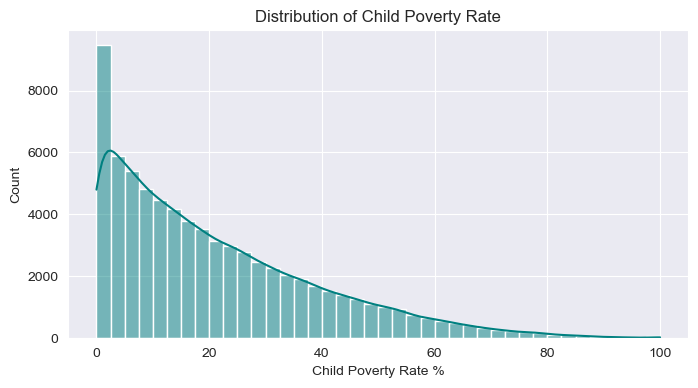

count    72718.000000
mean        21.148476
std         18.572714
min          0.000000
25%          6.200000
50%         16.300000
75%         31.600000
max        100.000000
Name: ChildPoverty, dtype: float64

In [8]:
'''
Visualization of the child poverty rates.
Insight for determination of quantization thresholds and class sizes
'''
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

plt.figure(figsize=(8,4))
sns.histplot(df['ChildPoverty'], bins=40, kde=True, color='teal')
plt.title('Distribution of Child Poverty Rate')
plt.xlabel('Child Poverty Rate %')
plt.ylabel('Count')
plt.show()
df['ChildPoverty'].describe()


## Defining Quantization Boundaries

The quartiles are defined as:
 - 25% Q1: 6.2%
 - Median Q2: 16.3%
 - 75% Q3: 31.6%

We can convert the `ChildPoverty` into four ordinal classes using the quartile thresholds at the boundaries described above.
Using this approach we can achieve equal class sizes aligning with United States Poverty Metrics. Provided is a description of the class categories I will be creating for clarity:

 - Class 0 - Low-Poverty: (0 - 6.2%) Below first quartile (Affluent Areas), <10% of children living below poverty line(suburban / upper income)


 - Class 1 - Moderate Poverty: (6.2% - 16.3%) Lower Middle Region, Close to U.S. National Average of 17% 


 - Class 2 - High Poverty: (16.3% - 31.6%) Upper Middle Region, These regions align with areas eligible for Title 1 Community Development Block Grants


 - Class 3 - Severe Poverty: (31.6% or higher) Highest quartile, Tracts where 1 in 3 children live in poverty. These are special funding zones like Appalachian or Tribal Reservation areas.


 ### Test Split Balancing
 
The dataset will be split 80%/20% and stratified by class to make sure the class proportions are the same in both subsets.

<b>Only the training set will be balanced so the test set will still retain the actual data distribution to achieve reliable evaluation metrics.</b>
 

References:

U.S. Census Bureau. (2018). Income and Poverty in the United States: 2017 (Current Population Reports, P60-263). Washington, DC.

U.S. Department of Health & Human Services. (2017, January 31). Annual Update of the HHS Poverty Guidelines. Federal Register, 82(19). Retrieved from https://www.federalregister.gov/documents/2017/01/31/2017-02076/annual-update-of-the-hhs-poverty-guidelines

U.S. Department of Education. (2017). Title I, Part A — Improving the Academic Achievement of the Disadvantaged.

U.S. Department of Housing and Urban Development. (2017). Community Development Block Grant (CDBG) Program.

PovertyClass
0    18229
1    18171
2    18148
3    18170
Name: count, dtype: int64


/var/folders/nn/b5ldlxzd6q1_ckxvlqfb5q480000gn/T/ipykernel_43363/3853615541.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PovertyClass', data=df, palette='viridis')


Text(0, 0.5, 'Tracts')

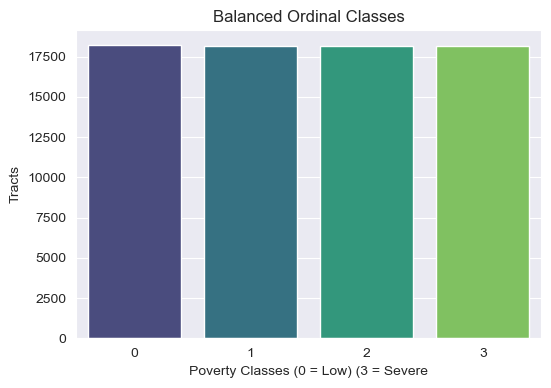

In [9]:
quartiles = [6.2, 16.3, 31.6]

def poverty_class(x):
    if x <= quartiles[0]:
        return 0
    elif x <= quartiles[1]:
        return 1
    elif x <= quartiles[2]:
        return 2
    else:
        return 3

df['PovertyClass'] = df['ChildPoverty'].apply(poverty_class)
print(df['PovertyClass'].value_counts().sort_index())

plt.figure(figsize=(6,4))
sns.countplot(x='PovertyClass', data=df, palette='viridis')
plt.title('Balanced Ordinal Classes')
plt.xlabel('Poverty Classes (0 = Low) (3 = Severe')
plt.ylabel('Tracts')

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ChildPoverty', 'PovertyClass'])
y = df['PovertyClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Training set size: ', X_train.shape)
print('Test set size: ', X_test.shape)

print('Training class distribution: ', y_train.value_counts(normalize=True).sort_index())
print('Test class distribution: ', y_test.value_counts(normalize=True).sort_index())


Training set size:  (58174, 34)
Test set size:  (14544, 34)
Training class distribution:  PovertyClass
0    0.250679
1    0.249888
2    0.249562
3    0.249871
Name: proportion, dtype: float64
Test class distribution:  PovertyClass
0    0.250688
1    0.249862
2    0.249587
3    0.249862
Name: proportion, dtype: float64


## Initial Modeling and Pre-Processing

### Model 1 - (No normalization or one-hot encoding)

In [34]:
import sys
from scipy.special import expit

'''
Base Two Layer Perceptron with the following:
(1) vectorized gradient computation 
(2) mini-batching
(3) cross entropy loss
(4) Glorot initialization
'''


class TLPMiniBatchCrossEntropy(object):
    def __init__(self, n_hidden=30, C=0.0, epochs=200, eta=0.01,
                 alpha=0.0, decrease_const=0.0, minibatches=1, shuffle=True,
                 random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha              
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        
    
    @staticmethod
    def _encode_labels(y):
        return pd.get_dummies(y).values.T
    
    @staticmethod
    def _sigmoid(z):
        return expit(z)
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        return (lambda_ / 2.0) * (np.mean(W1 ** 2) + np.mean(W2 ** 2))
    '''
    (3) cross entropy loss
    '''
    def _cost(self, A3, Y_enc, W1, W2):
        ce = -np.mean(Y_enc * np.log(A3 + 1e-7) + (1 - Y_enc) * np.log(1 - A3 + 1e-7))
        return ce + self._L2_reg(self.l2_C, W1, W2)
    
    def _feed_forward(self, X, W1, W2, b1, b2):
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    """
    (1) vectorized gradient computation 
    """
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        V2 = (A3 - Y_enc)
        V1 = (W2.T @ V2) * (A2 * (1 - A2))
        m = A1.shape[1] # mini batch size to average the gradients
        
        gradW2 = (V2 @ A2.T) / m
        gradW1 = (V1 @ A1.T) / m
        gradb2 = np.mean(V2, axis=1, keepdims=True)
        gradb1 = np.mean(V1, axis=1, keepdims=True)
        
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        return gradW1, gradW2, gradb1, gradb2
    
    def _update_weight_params(self, eta, gradW1, gradW2, gradb1, gradb2):
        self.W1 -= eta * gradW1
        self.W2 -= eta * gradW2
        self.b1 -= eta * gradb1
        self.b2 -= eta * gradb2
        
    '''
    (2) mini-batching loop
    '''   
    def fit(self, X, y, print_progress=True):
        X_data, y_data = np.asarray(X.copy()), np.asarray(y.copy())
        Y_enc = self._encode_labels(y)
        
        self.n_features = X.shape[1]
        self.n_outputs = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()
        
        self.cost_ = []
        for epoch in range(self.epochs):
            if print_progress and (epoch + 1) % print_progress == 0:
                sys.stdout.write(f'\rEpoch: {epoch+1}/{self.epochs}')
                sys.stdout.flush()
            if self.shuffle:
                idx = np.random.permutation(len(y_data))
                X_data, y_data = X_data[idx], y_data[idx]
            
            minibatch = np.array_split(range(len(y_data)), self.minibatches)
            batch_costs = []
            
            for batch_idx in minibatch:
                A1, Z1, A2, Z2, A3 = self._feed_forward(X_data[batch_idx], 
                                            self.W1, self.W2, self.b1, self.b2)
                
                cost = self._cost(A3, Y_enc[:, batch_idx], self.W1, self.W2)
                batch_costs.append(cost)
                
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(
                    A1, A2, A3, Z1, Z2, Y_enc[:, batch_idx], self.W1, self.W2
                )
                self._update_weight_params(self.eta, gradW1, gradW2, gradb1, gradb2)
                
            self.cost_.append(np.mean(batch_costs))
        return self
    
    def predict(self, X):
        _, _, _, _, A3 = self._feed_forward(X, self.W1, self.W2, self.b1, self.b2)
        return np.argmax(A3, axis=0)
    
    
class TLPBetterInitial(TLPMiniBatchCrossEntropy):
    """
    (4) Glorot initialization
    """
    def _initialize_weights(self):
        limit1 = np.sqrt(6 / (self.n_features + self.n_hidden))
        limit2 = np.sqrt(6 / (self.n_hidden + self.n_outputs))
        W1 = np.random.uniform(-limit1, limit1, (self.n_hidden, self.n_features))
        W2 = np.random.uniform(-limit2, limit2, (self.n_outputs, self.n_hidden))
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_outputs, 1))
        return W1, W2, b1, b2        

In [36]:
# Model Training and Score Metrics
    
from sklearn.metrics import accuracy_score

params = dict(n_hidden=50, 
              C=0.0, 
              epochs=200, 
              eta=0.01,
              minibatches=max(1, int(len(y_train) / 256)),
              random_state=1
              )

nn_raw = TLPBetterInitial(**params)

# Disabling Momentum and Decay
nn_raw.alpha=0.0
nn_raw.decrease_const=0.0
nn_raw.shuffle=True

nn_raw.fit(X_train, y_train, print_progress=20)

# Compute accuracy
yhat_raw = nn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, yhat_raw)
print(f' Accuracy for Model 1 with raw features: {acc_raw:.4f}')

Epoch: 200/200 Accuracy for Model 1 with raw features: 0.2508


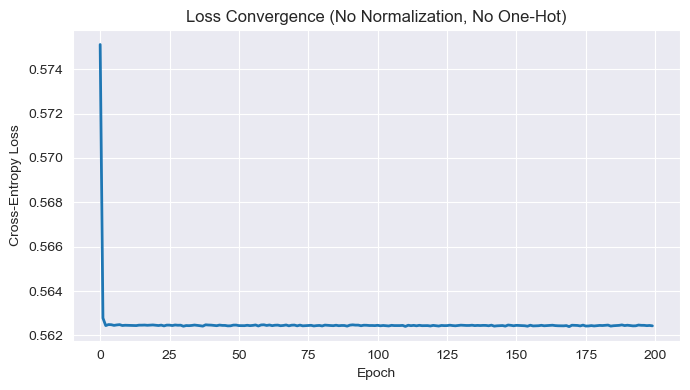

In [38]:
# loss function vs number of epochs on convergence
import matplotlib.pyplot as plt

raw_costs = [np.mean(epoch_costs) for epoch_costs in nn_raw.cost_]
plt.figure(figsize=(7,4))
plt.plot(raw_costs, linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("Loss Convergence (No Normalization, No One-Hot)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Convergence Behavior without Normalization or One-Hot
The loss converge quickly, but I don't think I could say this model is learning. It seems it is collapsing into a local minimum caused by the unscaled features and the categorical variables not being one hot encoded. 

One conclusion I can come to is that the sigmoid activations get saturated early in the training, and the gradients become very small and optimization stops making progress after only a few epochs. The input data is poorly represented in the network. This also attributes to the low accuracy score.

### Model 2 - (normalizing continuous numeric feature data)

In [46]:
from sklearn.preprocessing import StandardScaler

numeric_cols = X_train.select_dtypes(include=["float64", "float32", "int64"]).columns.tolist()

scaler = StandardScaler()
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

X_train_normalized[numeric_cols] = scaler.fit_transform(X_train_normalized[numeric_cols])
X_test_normalized[numeric_cols] = scaler.transform(X_test_normalized[numeric_cols])

nn_normalized = TLPBetterInitial(
    n_hidden=50,
    C=0.0,
    epochs=200,
    eta=0.01,
    minibatches=max(1, int(len(y_train)/256)),
    random_state=1
)

nn_normalized.fit(X_train_normalized, y_test, print_progress=20)
yhat_normalize = nn_normalized.predict(X_test_normalized)
acc_normalized = accuracy_score(y_test, yhat_normalize)
print(f' Accuracy for Model 2 with normalized features: {acc_normalized:.4f}')


Epoch: 200/200 Accuracy for Model 2 with normalized features: 0.1700


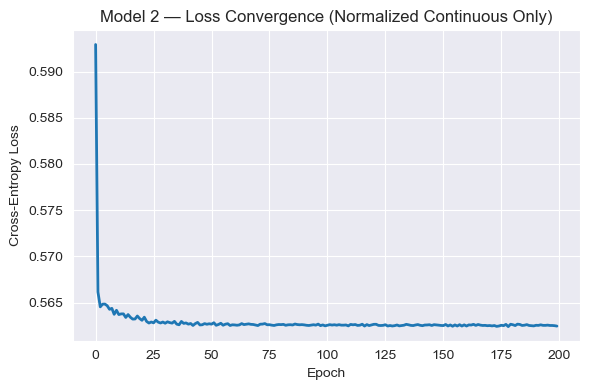

In [47]:
# Loss vs Epoch Convergence 

norm_costs = [np.mean(c) for c in nn_normalized.cost_]

plt.figure(figsize=(6,4))
plt.plot(norm_costs, label="Loss", linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("Loss Convergence (Normalized Continuous Only)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Convergence Behavior with Normalization Only


